<ul>
    <li><b>Clustering</b> is a machine learning technique that uses unsupervised learning.</li>
    - Group unlabelled data into natural clusters
    <li> Clustering is an optimization problem </li>
    <li> $variability(c) = \sum_{e \in c} distance(mean(c), e)^2$</li>
    <li> Variance is different from variability, you don't divide by n. This is because in clustering big and bad is worse than small and bad. </li>
    <li>$dissimilarity(C) = \sum_{c \in C}variability(c)$</li>
    <li> Find a C that minimises dissimilarity</li>
    <li> In order for this not to end up as each point being a cluster we add a constraint e.g. the clusters have to have some minimum distance between them or constrain the number of clusters</li>
    </ul>

<ul>
    <li><b>Hieracrhical Clustering </b></li>
    <li> Start by assigning each item to a cluster so that if you have N items you now have N clusters, each containing just one item</li>
    <li>Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now you have one fewer clusters</li>
    <li>Continue until all items are clustered into a single cluster of size N</li>
    <li> Agglomerative hierarchical clustering </li>
    <li> What do we mean by closest?</li>
    <li> Can get different clusters depending linkage metric we use </li>
    <li> <b>Single Linkage:</b> consider the distance between one clsuter and another cluster to be equal to the shortest distance from any member of one cluster to any member of another cluster</li>
    <li><b>Complete linkage</b>: consider the distance between one cluster and another cluster to be equal to the greatest distance from any member of one cluster to any member of the other cluster</li>
    <li><b>Average linkage</b>: consider the distance between one cluster and another cluster to be te average distance from any member of one cluster to any member of the other cluster</li>
    <ul>
    

<table style="width:50%">
<tr>
    <th>BOS</th>    
    <th>NY</th>
    <th>CHI</th>
    <th>DEN</th>
    <th>SF</th>
    <th>SEA</th>
</tr>
<tr>
    <th>0</th>    
    <th>206</th>
    <th>963</th>
    <th>1949</th>
    <th>3095</th>
    <th>2979</th>
</tr>
    <tr>
    <th>0</th>    
    <th>0</th>
    <th>802</th>
    <th>1771</th>
    <th>2934</th>
    <th>2815</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>966</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>808</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
</tr>

</table>

Cluster airports based on their distance.

__Clusters__
- [BOS, NY] [CHI] [DEN] [SF] [SEA]
- [BOS, NY ,CHI] [DEN] [SF] [SEA]
- [BOS, NY ,CHI] [DEN] [SF, SEA]
    - _Single_ -> [BOS, NY ,CHI, DEN] [SF, SEA]
    - _Complete_ -> [BOS, NY ,CHI] [DEN, SF, SEA]

__Pros and Cons of hierarchical clustering__

- Get a history of dendrograms
- Deterministic given a linkage metric
- Answer might not be optimal. Greedy algorithm. Making locally optimal decisions at each point may or may not give us optimal solution
- Flexible
- Really slow, complexity $O(n^3)$. Not something you want to work with on large datasets.

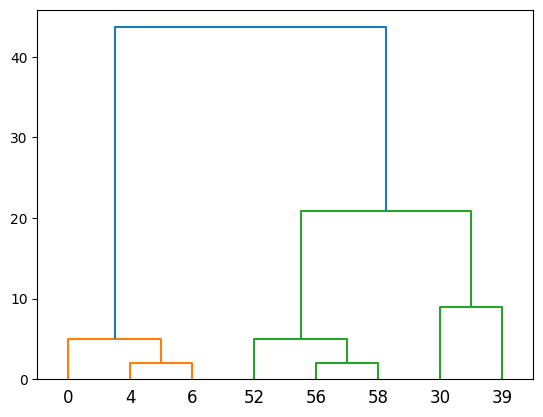

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = [0, 4, 6, 30, 39, 52, 56, 58]
Z = np.reshape(data, (len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(Z, method='average'), labels=data)

In [41]:
airports = ['BOS', 'NY', 'CHI', 'DEN', 'SF', 'SEA']
distance = [[0, 206, 963, 1949, 3095, 2979],
            [206, 0, 802, 1771, 2934, 2815],
            [963, 802, 0, 966, 1858, 2013],
            [1949, 1771, 966, 0, 1235, 1307],
            [3095, 2934, 1858, 1235, 0, 808],
            [2979, 2815, 2013, 1307, 808, 0]]


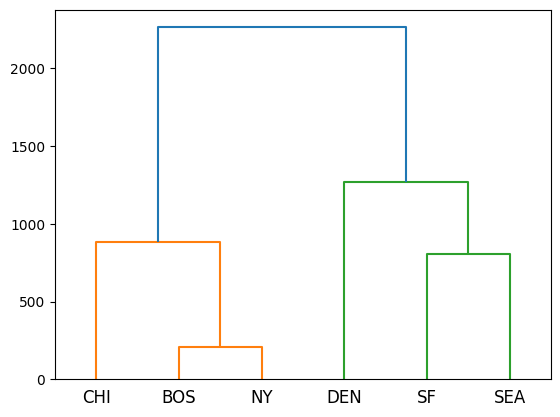

In [42]:
from scipy.spatial.distance import squareform

condensed_dist_matrix = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method='average'), labels=airports)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [44]:
dataset = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [45]:
points = dataset[0]

In [46]:
points

array([[-0.48428125,  6.1339592 ],
       [ 0.11528327, -4.98158692],
       [ 0.09417313, -4.05882797],
       [-7.556685  , -2.42379349],
       [ 0.59860361,  3.34704241],
       [-4.73695683, -1.23390307],
       [-1.88583355, -0.65794471],
       [-1.25918778,  8.42166447],
       [-5.46469501, -1.4677575 ],
       [-5.21118763, -0.88454091],
       [-2.39128542,  9.5902579 ],
       [-3.79577694, -3.94197151],
       [-0.55798628, -2.70088621],
       [-2.84694071, 11.70447814],
       [-5.88958899, -1.47219541],
       [-0.4497762 ,  4.58102297],
       [-6.15966811, -2.13553844],
       [-0.10009538,  8.99929345],
       [-2.15963524, -7.56230415],
       [-3.51874239, -4.48330466],
       [-1.32101631, 10.72186833],
       [ 5.19455346, -3.85790517],
       [ 1.00681205, -5.97364221],
       [-1.16539558,  7.39086886],
       [-3.25968528,  5.44630828],
       [-5.39405829,  0.12384806],
       [-3.87922543,  9.49845046],
       [-2.31431452,  9.98631399],
       [-1.92013725,

In [47]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

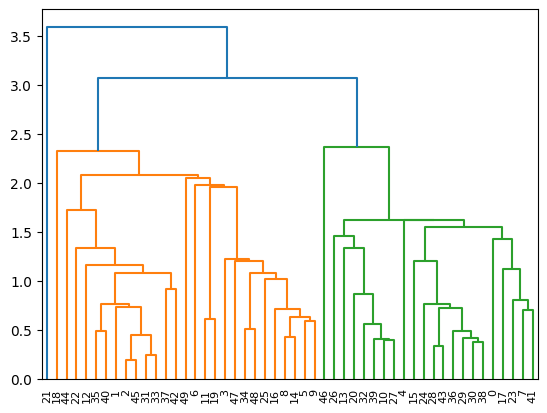

In [48]:
dendrogram = sch.dendrogram(sch.linkage(points, method='single'))

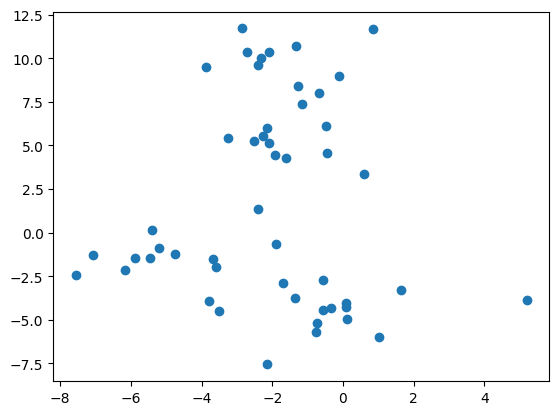

In [49]:
plt.scatter(dataset[0][:,0], dataset[0][:,1])

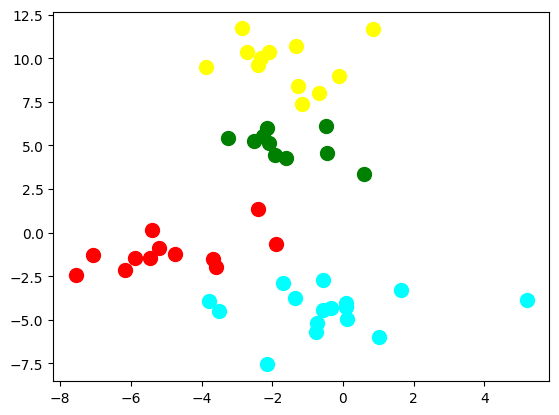

In [50]:
hc = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
y_hc = hc.fit_predict(points)
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='cyan')
plt.scatter(points[y_hc ==1,0], points[y_hc == 1,1], s=100, c='yellow')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='red')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='green')

In [51]:
import pandas as pandas
loan_data = pandas.read_csv('loan.csv')
loan_data.head()

/tmp/ipykernel_4619/2040071766.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pandas


FileNotFoundError: [Errno 2] No such file or directory: 'loan.csv'

In [52]:
loan_data.info()

NameError: name 'loan_data' is not defined

In [53]:
percent_missing = round(100 *(loan_data.isnull().sum())/len(loan_data), 2)

NameError: name 'loan_data' is not defined

In [54]:
percent_missing

NameError: name 'percent_missing' is not defined

In [55]:
cleaned_data = loan_data.drop(['purpose','not_fully_paid'], axis=1)

NameError: name 'loan_data' is not defined

In [57]:
import seaborn as sb
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sb.boxplot(data=df, orient="v")
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')